# Project Wrangling & Analyzing Data - WeRateDogs Twitter (Part II)

This is for Project Wrangling and Analysing Data - WeRateDogs Twitter

The whole project consist of 5 Stages:
1) Stage 1 - Gathering data
2) Stage 2 - Assessing data
3) Stage 3 - Cleaning data
4) Stage 4 - Storing, analyzing, and 
5) Stage 5 - Visualizing your wrangled data

Part I will consist of Stage 1 to 4

Part II will consist of Stage 5

We will now commence Part II - Stage 5 - Visualizing your wrangled data

## Stage 0 - Preparation of Battlefield - Loading of all relevant dependancies and libaries

In [1]:
# Stage 0 - Preparation of Battlefield - Loading of all relevant (standard battlepack) dependancies and libaries
import pandas as pd 
import numpy as np
import tweepy
import requests
import json
import os 
import re
import time
import csv
import sys
import warnings
import datetime as dt
import seaborn as sns
import matplotlib.pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats # Import Statistical Package for analysis
import matplotlib.pyplot as plt  # For Visualisation 
%matplotlib inline

## Stage 5 - Analysing and Visualing the Data

In [2]:
#Stage 5a - Visualizing your wrangled data - loading dataframe
df_master = pd.read_csv('twitter_project_clean.csv')
print(df_master.head())
df_master.info()

             tweet_id           tweet_date        tweet_source  \
0  667405339315146752  2015-11-19 18:13:27  Twitter for iPhone   
1  667435689202614272  2015-11-19 20:14:03  Twitter for iPhone   
2  667437278097252352  2015-11-19 20:20:22  Twitter for iPhone   
3  667443425659232256  2015-11-19 20:44:47  Twitter for iPhone   
4  667453023279554560  2015-11-19 21:22:56  Twitter Web Client   

                                          tweet_text  \
0  This is Biden. Biden just tripped... 7/10 http...   
1            Ermergerd 12/10 https://t.co/PQni2sjPsm   
2  Never seen this breed before. Very pointy pup....   
3  Exotic dog here. Long neck. Weird paws. Obsess...   
4  Meet Cupcake. I would do unspeakable things fo...   

                                           tweet_url     name  \
0  https://twitter.com/dog_rates/status/667405339...    Biden   
1  https://twitter.com/dog_rates/status/667435689...     None   
2  https://twitter.com/dog_rates/status/667437278...     None   
3  htt

Note: 
From the df_master.info(), we can see that some of the types, surprisingly have reverted back to its original (eg. tweet_id, from object to int64), even though we changed it in Part I. This is probably due to the .csv save. Therefore we will need to reclassify their type.

In [3]:
#Stage 5b - Changing column types 
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['tweet_date'] = pd.to_datetime(df_master.tweet_date)
df_master['tweet_source'] = df_master['tweet_source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['dog_gender'] = df_master['dog_gender'].astype('category')
df_master = df_master.set_index('tweet_date')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2015-11-19 18:13:27 to 2016-06-16 01:25:36
Data columns (total 15 columns):
tweet_id                   1994 non-null object
tweet_source               1994 non-null category
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
name                       1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
dog_stage                  1994 non-null category
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
dog_name                   1369 non-null object
dog_gender                 862 non-null category
rating_clean               1991 non-null float64
dtypes: category(3), float64(2), int64(3), object(7)
memory usage: 208.7+ KB


Analysis Approach

As WeRateDogs is all about dogs being rated. To start analysis, it is very important to have a research question to help duide the analysis. Therefore the research question is:

#### Research Question: "What type of tweets about Dogs will have the best rating?"

To answer the question. The analysis will be from 2 aspects, each with their respective question. 

1) Content - Is there a specific type (breeds, maturation, and gender) of dogs that is likely to be highly rated? 
    
2) Pattern - Is there a trend to be found in the tweets (favorites, followers, source and retweets)? 


### 1) Content - Is there a specific type (breeds, maturation, and gender) of dogs that is likely to be highly rated? 

Text(0,0.5,'dog_breed')

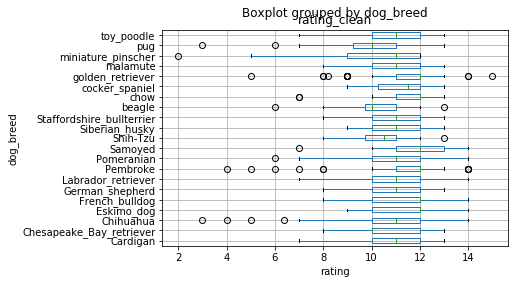

In [4]:
#Stage 5c - Which Dog_breed is rated highly?
df_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)
plt.figure(figsize=(40,40))
df_breed.boxplot(column = ['rating_clean'], by = ['dog_breed'], vert=False)
plt.xlabel('rating')
plt.ylabel('dog_breed')

Note: The Samoyed and Eskimo breeds seems to be rated highly. It is to be noted that the SD for the ratings of these 2 dogs are also very small, which means that consensus of the these 2 breeds being well-regarded is high.  

Text(0,0.5,'dog_breed')

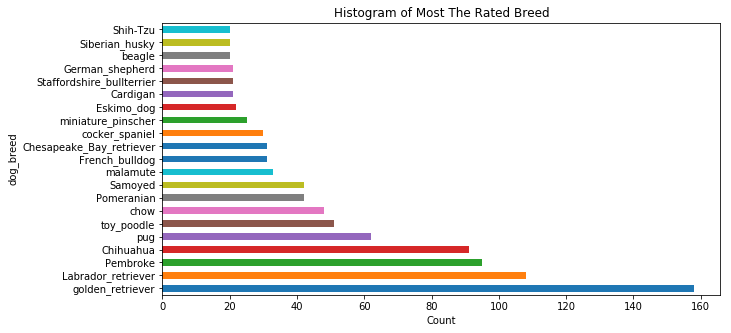

In [5]:
#Stage 5d - Which Dog_Breed is the most commonly rated?
df_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)
plt.figure(figsize=(10,5))
df_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breed')
plt.xlabel('Count')
plt.ylabel('dog_breed')

Note: The Retrievers (both Golden and Labrador) seems to be the most popular type of dogs. 

Text(0.5,1,'')

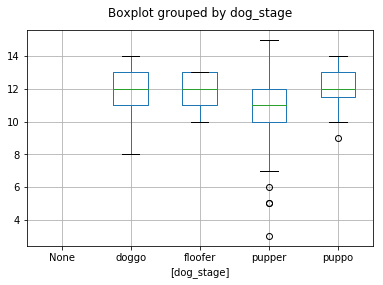

In [6]:
#Stage 5e - Which Dog_Stage is rated highly?
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_clean'], by = ['dog_stage'])
plt.title('')

Note: Dogs at the stage of doggo and floofer seems to be the most popular. 

Text(0.5,1,'')

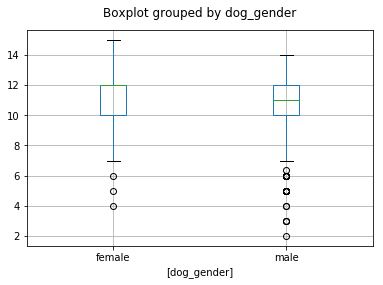

In [7]:
#Stage 5f - Which Dog_Gender is rated highly? Part I
df_master[df_master['dog_gender'] != 'None'].boxplot(column = ['rating_clean'], by = ['dog_gender'])
plt.title('')

Note: There does not seem to be a preferance between genders, however female dogs seems to be slightly more popular (12 vs. 11).

Text(0,0.5,'dog_gender')

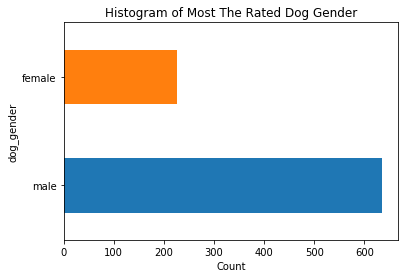

In [8]:
#Stage 5f - Which Dog_Gender is rated highly? - Part II
df_master['dog_gender'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Dog Gender')
plt.xlabel('Count')
plt.ylabel('dog_gender')

Note: The ratio of male dogs rated over female dogs is almost 3 times. 

### 2) Pattern - Is there a trend to be found in the tweets (favorites, followers, source and retweets)? 

Text(0.5,1,'Correlation Map')

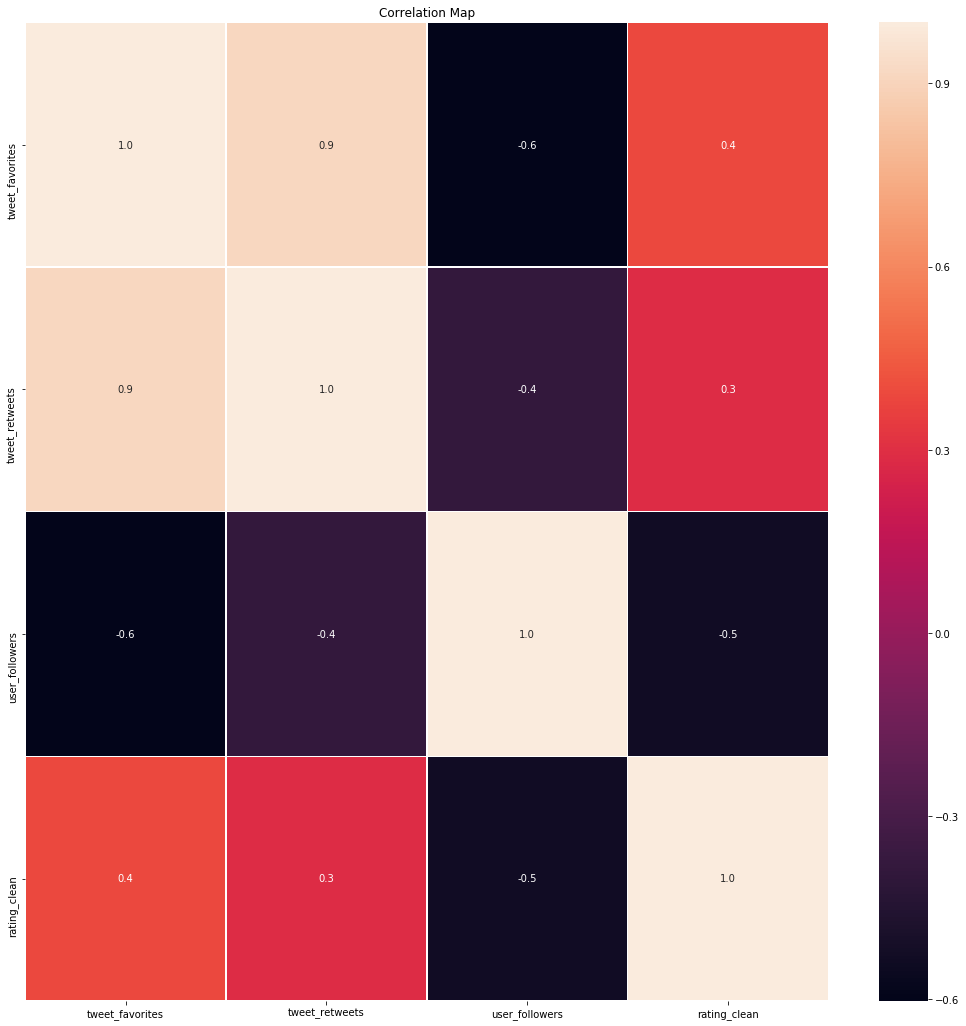

In [9]:
#Stage 5c - Changing column types 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_master[['tweet_source', 'tweet_favorites',
                       'tweet_retweets', 'user_followers', 
                       'rating_clean',]].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

Correlation
Postive: Strong correlation is observed between tweet_favorites and tweet_retweet. Which sorts of makes sense, if a tweet is considered a favorite, its chances of being retweeted is higher. 

Negative: Correlation is observed between user followers and retweet. Which was unexpected. Not sure why. 

Since ratings does not seem to be affected by whether they are followers, or being favorites, it can be said that the rating is "as it is" which can be considered a good thing. 
  

#### Special Note About Ratings

In [10]:
df_master['rating_clean'].describe()

count    1991.00000
mean       10.54824
std         2.19720
min         0.00000
25%        10.00000
50%        11.00000
75%        12.00000
max        15.00000
Name: rating_clean, dtype: float64

Note: 
As observed earlier, the ratings that the dogs have been given sometimes exceed more than 10. In fact, from the spread of the rating, it can be concluded that the rating is actually unreliable, as more than 75% of the data has more than 12/10 as rating with the mean as 10 (out of 10). Therefore the rating, should be reviewed (or a process to ensure that it remains reasonable). Or it should be changed more to a vote (to assess popularity) since the ratings or crazy. 

## Conclusion

Based on the data procured, the answer to the research question is: 
Dogs that are at the floofer and doggo stage (regardless of breed) are likley to get the better ratings. This is your best bet to get higher ratings. 
